In [1]:
import numpy as np
from scipy.optimize import curve_fit
import scipy.signal
import scipy.stats
import matplotlib.pyplot as plt
import mplhep
import pandas as pd
# %matplotlib qt

In [2]:
eu_df = pd.read_csv('152Eu.csv', skiprows=21)
bkg_df = pd.read_csv('bkg.csv', skiprows=21)

In [3]:
channels = eu_df['Channel'].to_numpy()
eu_counts = eu_df['Counts'].to_numpy()
bkg_counts = bkg_df['Counts'].to_numpy()

eu_counts -= bkg_counts
eu_counts_unnorm = eu_counts
eu_counts = eu_counts / 1200

In [4]:
calibrationVals = [2.27306926, 56.76252822]
channels_calib = (channels - calibrationVals[1]) / calibrationVals[0]

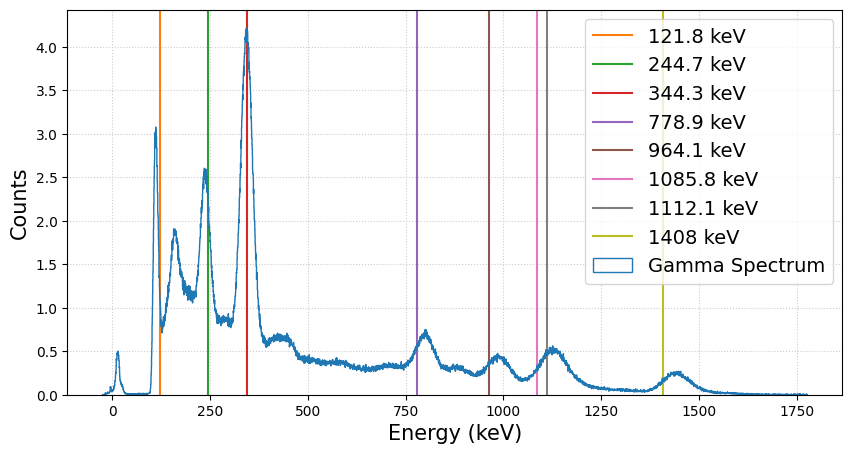

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel('Energy (keV)', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(color='#CCCCCC', linestyle=':')

plt.axvline(121.7817, color='C1', label='121.8 keV', lw=1.5)
plt.axvline(244.6974, color='C2', label='244.7 keV', lw=1.5)
plt.axvline(344.2785, color='C3', label='344.3 keV', lw=1.5)
plt.axvline(778.9045, color='C4', label='778.9 keV', lw=1.5)
plt.axvline(964.057, color='C5', label='964.1 keV', lw=1.5)
plt.axvline(1085.837, color='C6', label='1085.8 keV', lw=1.5)
plt.axvline(1112.076, color='C7', label='1112.1 keV', lw=1.5)
plt.axvline(1408.013, color='C8', label='1408 keV', lw=1.5)

plt.hist(channels_calib, bins=channels_calib, weights=eu_counts, histtype='step', label='Gamma Spectrum')

plt.legend(loc='upper right', fontsize=14)

plt.savefig('../Report/Plots/eu.pdf')

In [8]:
current_activity = 3.34e4
detector_radius = 5.5 / 2
detector_distance = 3

# solid_angle = ( np.pi * detector_radius**2 ) / ( detector_distance**2 )
fraction_incident = ( np.pi * detector_radius**2 ) / ( 4 * np.pi * detector_distance**2 )
print(fraction_incident)


incident_activity = current_activity * fraction_incident

print(f'Incident Activity: {incident_activity}')

0.21006944444444445
Incident Activity: 7016.319444444444


[ 3.77049871  8.15798812 11.85993232 27.52464061 34.00304294 49.46208767]
[58198, 107695, 243542, 90044, 69360, 50833]
[1731438.8157      458197.09283333  625063.80456667  303951.6733
  880588.05523333 1266566.00363333]
[0.03361251 0.23504078 0.38962742 0.29624446 0.07876555 0.04013451]


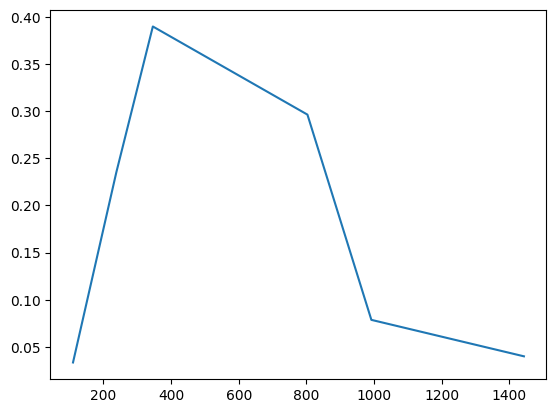

In [10]:
peaks = np.array([110, 238, 346, 803, 992, 1443])
peakResHalf = (peaks * 0.06855452205872739) / 2

print(peakResHalf)

N_Meas = []

for counter, peak in enumerate(peaks):
    left = np.where(channels_calib >= peak - peakResHalf[counter])[0][0]
    right = np.where(channels_calib >= peak + peakResHalf[counter])[0][0]

    N_Meas.append(np.sum(eu_counts_unnorm[left:right]))

print(N_Meas)

yields = np.array([0.2853 * 0.7208, 0.0755 * 0.7208, 0.2659 * 0.2792, 0.1293 * 0.2792, 0.1451 * 0.7208, 0.2087 * 0.7208])

N_Emit = yields * incident_activity * 1200
print(N_Emit)

print(N_Meas / N_Emit)
plt.figure()
plt.plot(peaks, N_Meas / N_Emit)

In [11]:
print(yields)

[0.20564424 0.0544204  0.07423928 0.03610056 0.10458808 0.15043096]
